In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/template-matching/Test.png
/kaggle/input/template-matching/Template.png


In [2]:
v1 = [-1, -10, 2, 5, 7, 8,]
v2 = [-1, -9, 2, 5, 7, 8,]
v3 = list(map(lambda x: -x, v2)) # v3 = v2*(-1)

d12 = np.dot(v1, v2)
cos12 = d12/(np.linalg.norm(v1)*np.linalg.norm(v2))
print(cos12)

d13 = np.dot(v1, v3)
cos13 = d13/(np.linalg.norm(v1)*np.linalg.norm(v3))
print(cos13)

0.9986855705879838
-0.9986855705879838


# Tempalte Matching

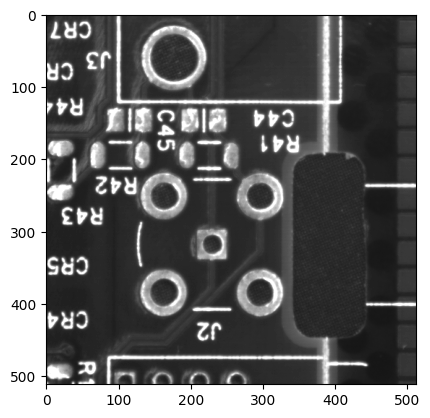

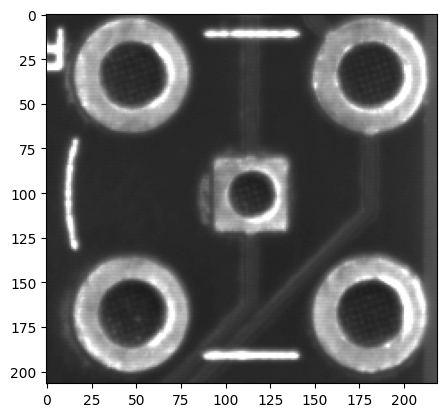

template: (207, 219)
template: 45333 px
image: (512, 512)
image: 262144 px


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow


template1 = cv.imread("/kaggle/input/template-matching/Template.png")
test_image = cv.imread("/kaggle/input/template-matching/Test.png")
template = cv.cvtColor(template1, cv.COLOR_BGR2GRAY)
test_image = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)

tem_h, tem_w = template.shape
im_h, im_w = test_image.shape

plt.imshow(test_image, cmap='gray', vmin=0, vmax=255)
plt.show()
# plt.imshow(template1)
plt.imshow(template, cmap='gray', vmin=0, vmax=255)
plt.show()

# cv2_imshow(image)
# cv2_imshow(template)

print(f"template: {template.shape}")
print(f"template: {template.shape[0]*template.shape[1]} px")
print(f"image: {test_image.shape}")
print(f"image: {test_image.shape[0]*test_image.shape[1]} px")

In [4]:
template.reshape(-1).shape

(45333,)

In [5]:
test_image

array([[ 50,  45,  40, ...,  52,  51,  50],
       [ 44,  40,  36, ...,  44,  44,  44],
       [ 40,  38,  36, ...,  41,  42,  42],
       ...,
       [118, 150, 127, ...,  52,  50,  50],
       [174, 213, 175, ...,  57,  55,  55],
       [189, 231, 191, ...,  54,  54,  54]], dtype=uint8)

In [6]:
test_image[0:3,0:5]

array([[50, 45, 40, 38, 35],
       [44, 40, 36, 34, 32],
       [40, 38, 36, 34, 33]], dtype=uint8)

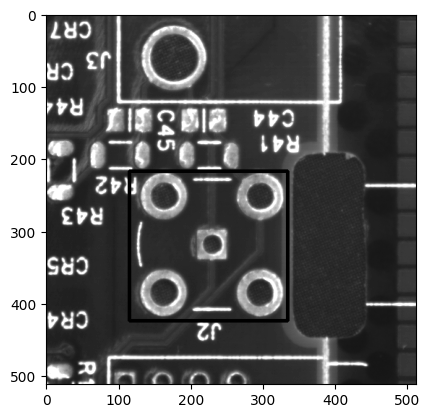

In [7]:
image = test_image

template_u = np.mean(template)
template_sd = np.std(template)
template_vec = (template.reshape(-1) - template_u) / template_sd
n = tem_h*tem_w
ncc = np.zeros_like(image, dtype=float)

for i in range(im_h-tem_h):
    for j in range(im_w-tem_w):
        crop = image[i:tem_h+i, j:tem_w+j]
        crop_u = np.mean(crop)
        crop_sd = np.std(crop)
        crop_vec = (crop.reshape(-1) - crop_u) / crop_sd
        ncc[i,j] = np.dot(template_vec, crop_vec)/n # cosine similarity measure, normalize cross correlation
        
i, j = np.where(ncc == np.max(ncc))
image_show = image.copy()
cv.rectangle(image_show, (j[0], i[0]), (j[0]+tem_w, i[0]+tem_h), 0, 3)
plt.imshow(image_show, cmap='gray', vmin=0, vmax=255)
plt.show()


In [8]:
display(ncc)
print(ncc[i[0], j[0]])

array([[0.02700699, 0.03316549, 0.03734896, ..., 0.        , 0.        ,
        0.        ],
       [0.03579107, 0.04223624, 0.04671031, ..., 0.        , 0.        ,
        0.        ],
       [0.04226539, 0.04884045, 0.05351434, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

0.9912682769855071


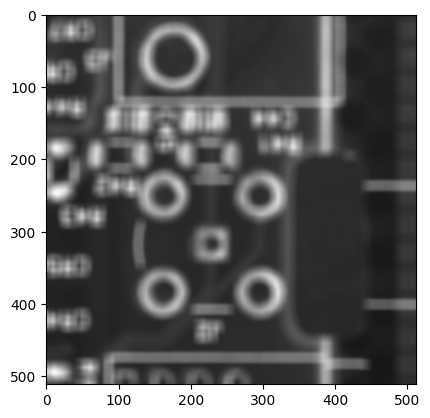

In [9]:
image_blur = cv.blur(test_image,(15,15))
plt.imshow(image_blur, cmap='gray', vmin=0, vmax=255)
plt.show()

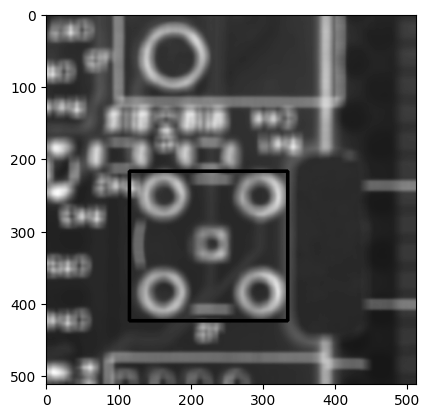

0.8764362023801341


In [10]:
tem_h, tem_w = template.shape
im_h, im_w = image_blur.shape
template_u = np.mean(template)
template_sd = np.std(template)
template_vec = (template.reshape(-1) - template_u) / template_sd
n = tem_h*tem_w
ncc = np.zeros_like(image_blur, dtype=float)

for i in range(im_h-tem_h):
    for j in range(im_w-tem_w):
        crop = image_blur[i:tem_h+i, j:tem_w+j]
        crop_u = np.mean(crop)
        crop_sd = np.std(crop)
        crop_vec = (crop.reshape(-1) - crop_u) / crop_sd
        ncc[i,j] = np.dot(template_vec, crop_vec)/n # cosine similarity measure, normalize cross correlation
        
i, j = np.where(ncc == np.max(ncc))
image_show = image_blur.copy()
cv.rectangle(image_show, (j[0], i[0]), (j[0]+tem_w, i[0]+tem_h), 0, 3)
plt.imshow(image_show, cmap='gray', vmin=0, vmax=255)
plt.show()

print(ncc[i[0], j[0]])

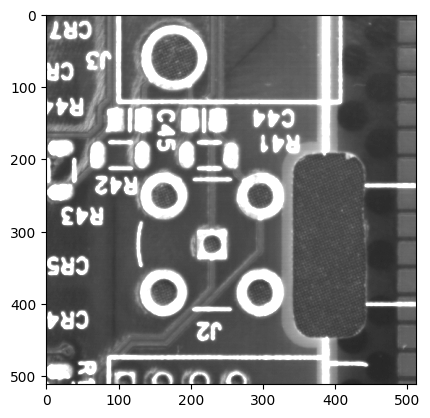

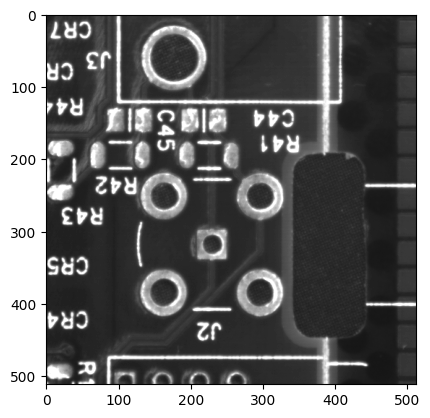

[[ 90.   81.   72.  ...  93.6  91.8  90. ]
 [ 79.2  72.   64.8 ...  79.2  79.2  79.2]
 [ 72.   68.4  64.8 ...  73.8  75.6  75.6]
 ...
 [212.4 270.  228.6 ...  93.6  90.   90. ]
 [313.2 383.4 315.  ... 102.6  99.   99. ]
 [340.2 415.8 343.8 ...  97.2  97.2  97.2]]


[[ 50  45  40 ...  52  51  50]
 [ 44  40  36 ...  44  44  44]
 [ 40  38  36 ...  41  42  42]
 ...
 [118 150 127 ...  52  50  50]
 [174 213 175 ...  57  55  55]
 [189 231 191 ...  54  54  54]]


459.0
255


In [11]:
# image_bright = test_image * 1.5
image_bright = test_image * 1.8
# image_bright = test_image * 2

plt.imshow(image_bright, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(test_image, cmap='gray', vmin=0, vmax=255)
plt.show()
print(image_bright)
print("\n")
print(test_image)
print("\n")
print(np.max(image_bright))
print(np.max(test_image))

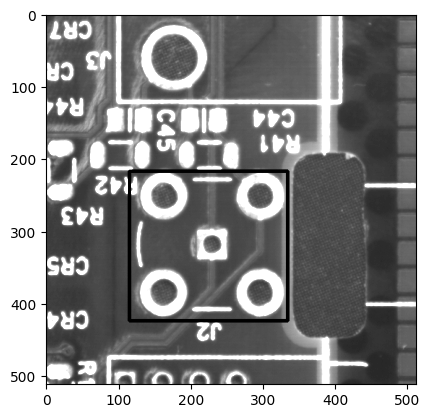

0.9912682769855071


In [12]:
image = image_bright
# image = image_dark

tem_h, tem_w = template.shape
im_h, im_w = image.shape
template_u = np.mean(template)
template_sd = np.std(template)
template_vec = (template.reshape(-1) - template_u) / template_sd
n = tem_h*tem_w
ncc = np.zeros_like(image, dtype=float)

for i in range(im_h-tem_h):
    for j in range(im_w-tem_w):
        crop = image[i:tem_h+i, j:tem_w+j]
        crop_u = np.mean(crop)
        crop_sd = np.std(crop)
        crop_vec = (crop.reshape(-1) - crop_u) / crop_sd
        ncc[i,j] = np.dot(template_vec, crop_vec)/n # cosine similarity measure, normalize cross correlation
        
i, j = np.where(ncc == np.max(ncc))
image_show = image.copy()
cv.rectangle(image_show, (j[0], i[0]), (j[0]+tem_w, i[0]+tem_h), 0, 3)
plt.imshow(image_show, cmap='gray', vmin=0, vmax=255)
plt.show()

print(ncc[i[0], j[0]])

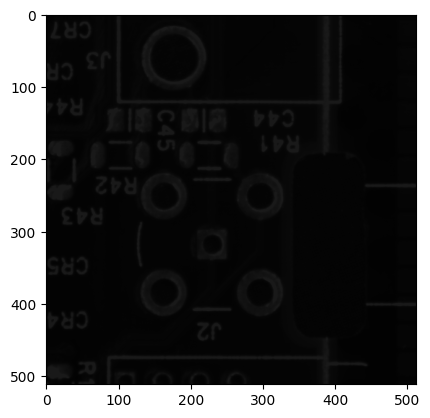

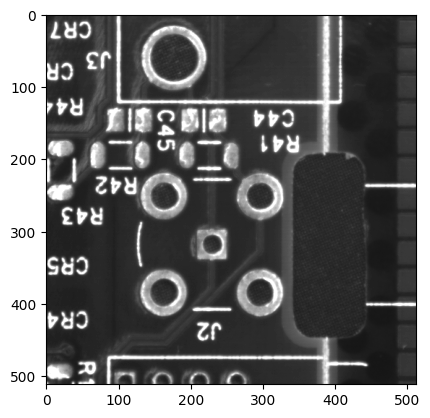

[[ 5.   4.5  4.  ...  5.2  5.1  5. ]
 [ 4.4  4.   3.6 ...  4.4  4.4  4.4]
 [ 4.   3.8  3.6 ...  4.1  4.2  4.2]
 ...
 [11.8 15.  12.7 ...  5.2  5.   5. ]
 [17.4 21.3 17.5 ...  5.7  5.5  5.5]
 [18.9 23.1 19.1 ...  5.4  5.4  5.4]]


[[ 50  45  40 ...  52  51  50]
 [ 44  40  36 ...  44  44  44]
 [ 40  38  36 ...  41  42  42]
 ...
 [118 150 127 ...  52  50  50]
 [174 213 175 ...  57  55  55]
 [189 231 191 ...  54  54  54]]


25.5
255


In [13]:
image_dark = test_image * 0.1
plt.imshow(image_dark, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(test_image, cmap='gray', vmin=0, vmax=255)
plt.show()
print(image_dark)
print("\n")
print(test_image)
print("\n")
print(np.max(image_dark))
print(np.max(test_image))

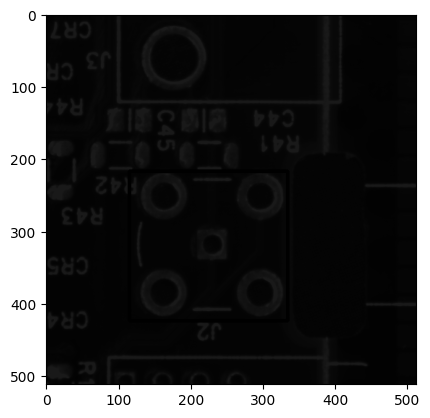

0.9912682769855073


In [14]:
# image = image_bright
image = image_dark

tem_h, tem_w = template.shape
im_h, im_w = image.shape
template_u = np.mean(template)
template_sd = np.std(template)
template_vec = (template.reshape(-1) - template_u) / template_sd
n = tem_h*tem_w
ncc = np.zeros_like(image, dtype=float)

for i in range(im_h-tem_h):
    for j in range(im_w-tem_w):
        crop = image[i:tem_h+i, j:tem_w+j]
        crop_u = np.mean(crop)
        crop_sd = np.std(crop)
        crop_vec = (crop.reshape(-1) - crop_u) / crop_sd
        ncc[i,j] = np.dot(template_vec, crop_vec)/n # cosine similarity measure, normalize cross correlation
        
i, j = np.where(ncc == np.max(ncc))
image_show = image.copy()
cv.rectangle(image_show, (j[0], i[0]), (j[0]+tem_w, i[0]+tem_h), 0, 3)
plt.imshow(image_show, cmap='gray', vmin=0, vmax=255)
plt.show()

print(ncc[i[0], j[0]])